In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL')
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW')

In [205]:
df = tickers.download(period="2y")

[*********************100%***********************]  15 of 15 completed

2 Failed downloads:
['BKW']: YFPricesMissingError('possibly delisted; no price data found  (period=2y)')
['SGRE.MC']: YFPricesMissingError('possibly delisted; no price data found  (period=2y) (Yahoo error = "No data found, symbol may be delisted")')


In [206]:

# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:
    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    info = t.info
    hist = t.history(period="2y")

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

$SGRE.MC: possibly delisted; no price data found  (period=2y) (Yahoo error = "No data found, symbol may be delisted")
$BKW: possibly delisted; no price data found  (period=2y)


In [207]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,GF,"New Germany Fund, Inc. (The)",The New Germany Fund Inc. is a closed ended eq...,$0.17B,0.03M,18.83,N/A,18.831626
1,AWK,"American Water Works Company, I","American Water Works Company, Inc., through it...",$27.54B,1.15M,4.2,N/A,4.203425
2,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$71.45B,1.1M,60.59,N/A,60.586869
3,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$24.15B,1.77M,25.99,N/A,25.988729
4,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.68B,0.18M,65.81,N/A,65.813785
5,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$29.87B,1.44M,26.64,N/A,26.639044
6,NEE,"NextEra Energy, Inc.","NextEra Energy, Inc., through its subsidiaries...",$142.78B,10.72M,-2.48,N/A,-2.475189
7,IBE.MC,ACCIONES IBERDROLA,"Iberdrola, S.A. engages in the generation, pro...",$90.48B,11.12M,41.66,N/A,41.663649
8,FSLR,"First Solar, Inc.","First Solar, Inc., a solar technology company,...",$13.38B,2.43M,-40.55,N/A,-40.549157
9,ENPH,"Enphase Energy, Inc.","Enphase Energy, Inc., together with its subsid...",$7.89B,4.15M,-69.57,N/A,-69.567992


In [208]:
# Display the data
df

Price      Adj Close               Close                             \
Ticker           BKW SGRE.MC         AWK        BEP BKW         BMI   
Date                                                                  
2023-03-27       NaN     NaN  135.547394  27.473701 NaN  116.546379   
2023-03-28       NaN     NaN  135.107285  27.833620 NaN  117.187950   
2023-03-29       NaN     NaN  137.900925  28.341194 NaN  118.323013   
2023-03-30       NaN     NaN  139.575150  28.802628 NaN  118.194695   
2023-03-31       NaN     NaN  140.149185  29.079485 NaN  120.237816   
...              ...     ...         ...        ...  ..         ...   
2025-03-20       NaN     NaN  141.809998  23.650000 NaN  196.630005   
2025-03-21       NaN     NaN  141.130005  23.690001 NaN  189.490005   
2025-03-24       NaN     NaN  139.699997  23.570000 NaN  194.179993   
2025-03-25       NaN     NaN  139.160004  23.379999 NaN  195.750000   
2025-03-26       NaN     NaN  141.244995  22.514999 NaN  193.250000   

Price                                                      ...     Volume  \
Ticker             ECL        ENPH        FSLR         GF  ...       ENPH   
Date                                                       ...              
2023-03-27  156.862137  195.830002  210.139999   8.583572  ...  2769500.0   
2023-03-28  156.832733  193.520004  210.009995   8.603239  ...  1811100.0   
2023-03-29  158.839920  203.949997  215.350006   8.662232  ...  3643000.0   
2023-03-30  159.867981  205.270004  213.320007   8.780220  ...  3051200.0   
2023-03-31  162.070938  210.279999  217.500000   8.937535  ...  2776800.0   
...                ...         ...         ...        ...  ...        ...   
2025-03-20  251.940002   61.689999  128.460007  10.420000  ...  2076500.0   
2025-03-21  251.000000   61.540001  131.320007  10.250000  ...  5259800.0   
2025-03-24  252.619995   62.160000  128.820007  10.290000  ...  2127400.0   
2025-03-25  251.199997   62.770000  131.460007  10.320000  ...  2320200.0   
2025-03-26  251.899994   59.580002  124.930000  10.200000  ...  1245910.0   

Price                                                                      \
Ticker           FSLR        GF      IBE.MC         NEE ORSTED.CO SGRE.MC   
Date                                                                        
2023-03-27  1284700.0    3400.0  16769881.0   5515900.0  538210.0     NaN   
2023-03-28  1052200.0   12300.0  43303754.0   5935500.0  442780.0     NaN   
2023-03-29  1619700.0    6800.0   8819996.0   5680500.0  470628.0     NaN   
2023-03-30  1542200.0   10000.0   9562583.0   6187000.0  522596.0     NaN   
2023-03-31  1290000.0    5100.0  14093520.0  10124400.0  449488.0     NaN   
...               ...       ...         ...         ...       ...     ...   
2025-03-20  1833500.0  125500.0  10455660.0  11815600.0  488152.0     NaN   
2025-03-21  4510100.0   45700.0  35440611.0  15782000.0  842657.0     NaN   
2025-03-24  3866100.0   77600.0   9559973.0  12385400.0  405587.0     NaN   
2025-03-25  3762400.0   55800.0   8021060.0  12617200.0  380681.0     NaN   
2025-03-26  2287810.0    5210.0   5841914.0   3929311.0  348880.0     NaN   

Price                                        
Ticker           VLTO     VWS.CO        XYL  
Date                                         
2023-03-27        NaN  1787807.0  1365700.0  
2023-03-28        NaN  1648176.0  1301700.0  
2023-03-29        NaN  1702559.0  1452500.0  
2023-03-30        NaN  2519415.0   949300.0  
2023-03-31        NaN  1688473.0  2059400.0  
...               ...        ...        ...  
2025-03-20  1061800.0  3874374.0  1329200.0  
2025-03-21  2879700.0  4200872.0  2663500.0  
2025-03-24  1094000.0  2815786.0  2251800.0  
2025-03-25  1201900.0  2154314.0  1745400.0  
2025-03-26   319803.0  2464588.0   580306.0  

[517 rows x 103 columns]

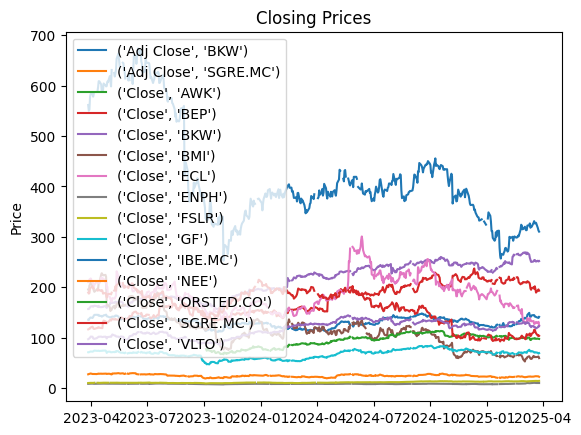

In [209]:
# Plot closing prices
plt.plot(df['Close'])
plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

In [210]:
df_normalized_closed = df['Close'] / df['Close'].iloc[0]
df_normalized_closed

Ticker,AWK,BEP,BKW,BMI,ECL,ENPH,FSLR,GF,IBE.MC,NEE,ORSTED.CO,SGRE.MC,VLTO,VWS.CO,XYL
Date,,,,,,,,,,,,,,,
2023-03-27,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000
2023-03-28,0.996753,1.013100,NaN,1.005505,0.999813,0.988204,0.999381,1.002291,1.005811,0.997349,0.979694,NaN,NaN,0.988710,1.005633
2023-03-29,1.017363,1.031575,NaN,1.015244,1.012608,1.041465,1.024793,1.009164,1.012070,1.008881,0.983612,NaN,NaN,0.994197,1.020823
2023-03-30,1.029715,1.048371,NaN,1.014143,1.019162,1.048205,1.015133,1.022910,1.019669,1.015244,1.028678,NaN,NaN,1.046323,1.030077
2023-03-31,1.033950,1.058448,NaN,1.031674,1.033206,1.073788,1.035024,1.041237,1.026821,1.021739,1.039188,NaN,NaN,1.049910,1.053214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-20,1.046202,0.860823,NaN,1.687140,1.606124,0.315018,0.611307,1.213947,1.384818,0.999768,0.583007,NaN,NaN,0.589585,1.234688
2025-03-21,1.041186,0.862279,NaN,1.625876,1.600131,0.314252,0.624917,1.194141,1.411252,0.995974,0.584075,NaN,NaN,0.574021,1.220573
2025-03-24,1.030636,0.857911,NaN,1.666118,1.610459,0.317418,0.613020,1.198802,1.394119,0.984592,0.565194,NaN,NaN,0.548697,1.244578


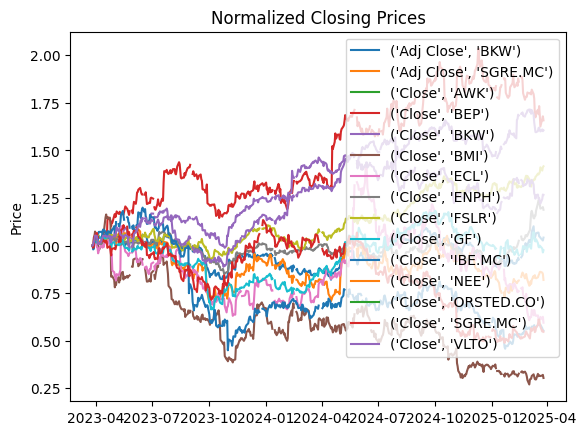

In [211]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [212]:
# Add a new column 'Volatility' to DataFrame df_mini
# Calculate the volatility of each stock in the past year based on normalized closing prices
df_mini = pd.DataFrame()

df_mini['Volatility'] = df['Close'].pct_change().std()

df_mini

C:\Users\Admin\AppData\Local\Temp\ipykernel_65968\3823662868.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_mini['Volatility'] = df['Close'].pct_change().std()


,Volatility
Ticker,
AWK,0.013357
BEP,0.021673
BKW,NaN
BMI,0.018191
ECL,0.011446
ENPH,0.038546
FSLR,0.032739
GF,0.010145
IBE.MC,0.009839


In [213]:
# Calculate final weighting based on volatility 
df_mini['Inverse Volatility'] = 1 / df_mini['Volatility']
sum_inverse_volatility = df_mini['Inverse Volatility'].sum()
df_mini['Volatility Weighting'] = df_mini['Inverse Volatility'] / sum_inverse_volatility
df_mini


,Volatility,Inverse Volatility,Volatility Weighting
Ticker,,,
AWK,0.013357,74.864608,0.093521
BEP,0.021673,46.139444,0.057637
BKW,NaN,NaN,NaN
BMI,0.018191,54.972715,0.068672
ECL,0.011446,87.364127,0.109135
ENPH,0.038546,25.942762,0.032408
FSLR,0.032739,30.544291,0.038156
GF,0.010145,98.570368,0.123134
IBE.MC,0.009839,101.632722,0.126960


In [214]:
# Calculate sum of final weighting to verify correctness
sum_final_weighting = df_mini['Volatility Weighting'].sum()
sum_final_weighting

np.float64(0.9999999999999997)